In [1]:
import pandas as pd
import numpy as np
from dotenv import dotenv_values, find_dotenv
import matplotlib.pyplot as plt
import os
config = dotenv_values(find_dotenv())
path_cleandata = os.path.abspath(config["CLEANDATA"]) + '\\'
path_figures = os.path.abspath(config["FIGURES"]) + '\\'

In [15]:
# import my merged data
data = pd.read_pickle(path_cleandata + 'BEA6_naics6_merged.pkl')

In [16]:
# filter for the year 2017 
data2017 = data[data['date'].dt.year == 2017]

In [17]:
# personal consumption expenditures
data2017 = data2017[data2017['product_O'].str.contains('Personal consumption expenditures')][['product_I', 'date', 'IO_value', 'expenditures_I']]

In [18]:
# sum by product for that year
# first groupby: take sum of IO_value and mean of expenditures_I by date and product
byproduct = data2017.groupby(['product_I']).agg({
    'IO_value': 'mean',
    'expenditures_I': 'mean'}, min_count=1).reset_index()


In [19]:
byproduct.set_index('product_I')[['IO_value', 'expenditures_I']].sum(axis=0)

IO_value          11362488.0
expenditures_I    13578616.0
dtype: float64

## taking a look at how well the merge worked

In [20]:
# create distance variable
byproduct['distance'] = np.abs(byproduct['IO_value'] - byproduct['expenditures_I'])

# kinda "outliers" that have a very different value
outlier_threshold = 50000

# Filter only the points that are outliers
outliers = byproduct[byproduct['distance'] > outlier_threshold]

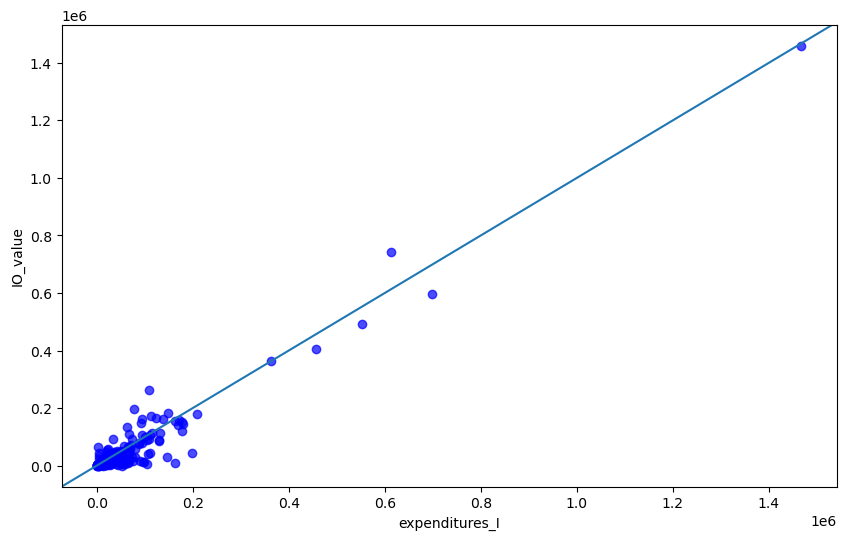

In [25]:
# do the scatter plot with expenditures on the x axis

plt.figure(figsize=(10, 6))
plt.scatter(byproduct['expenditures_I'], byproduct['IO_value'], c='blue', alpha=0.7)

plt.xlabel('expenditures_I')
plt.ylabel('IO_value')

ax = plt.gca()
ax.axline((0, 0), slope=1)

# annotations for outliers
# for idx, row in outliers.iterrows():
#    ax.annotate(row['product_I'].strip(), (row['expenditures_I'], row['IO_value']))

plt.savefig(path_figures + 'merge_check\\expenditures.pdf')

In [22]:
# this is the list of "outlier" products: issues mostly come from housing and healthcare type stuff
# noting the 2017 expenditures for tenant-occupied stationary houses is 0: having trouble getting min_count to work (actually all NaNs)
# within the merge, foreign travel in the United States gets matched with the rest-of-world adjustment in the IO table, which i should probably get rid of
outliers

,product_I,IO_value,expenditures_I,distance
2,Alcohol in purchased meals,12738.496112,99191.00,86452.503888
3,All other professional medical services,133430.256219,63740.75,69689.506219
4,"Amusement parks, campgrounds, and related recr...",11507.453564,66814.75,55307.296436
13,"Cable, satellite, and other live television se...",13870.685335,96011.00,82140.314665
16,Casino gambling,43673.159615,111858.25,68185.090385
37,"Education services, gross output",42077.272514,198067.25,155989.977486
51,"Food products, not elsewhere classified",10259.041070,161953.75,151694.708930
59,Furniture,7113.237827,104784.25,97671.012173
65,"Hair, dental, shaving, and miscellaneous perso...",14842.869502,76118.00,61275.130498
67,Home health care,38869.919406,107391.00,68521.080594


In [23]:
# go into concordance, which shows some of the issues

concordance = pd.read_pickle(path_cleandata + 'concordance//concordance6_naics6_addproportions.pkl')
outlierproducts = list(outliers['product_I'])

outliermerges = concordance[concordance['product'].isin(outlierproducts)]
outliermerges



,product,NAICS_desc,IO_proportions
24,All other professional medical services,Offices of other health practitioners,0.857806
25,All other professional medical services,Other personal services,0.734121
26,All other professional medical services,"All other miscellaneous professional, scientif...",1.000000
56,"Amusement parks, campgrounds, and related recr...",Amusement parks and arcades,0.656743
75,Net motor vehicle and other transportation ins...,Direct life insurance carriers,0.783770
76,Net motor vehicle and other transportation ins...,"Insurance carriers, except direct life",0.404028
104,"Food products, not elsewhere classified",Snack food manufacturing,0.209266
105,"Food products, not elsewhere classified",Food and beverage stores,0.165355
129,Physician services (44),Offices of physicians,1.000000
135,Net transactions in used trucks,Truck transportation,0.354518


c:\Users\EmilyFu\.conda\envs\myenv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


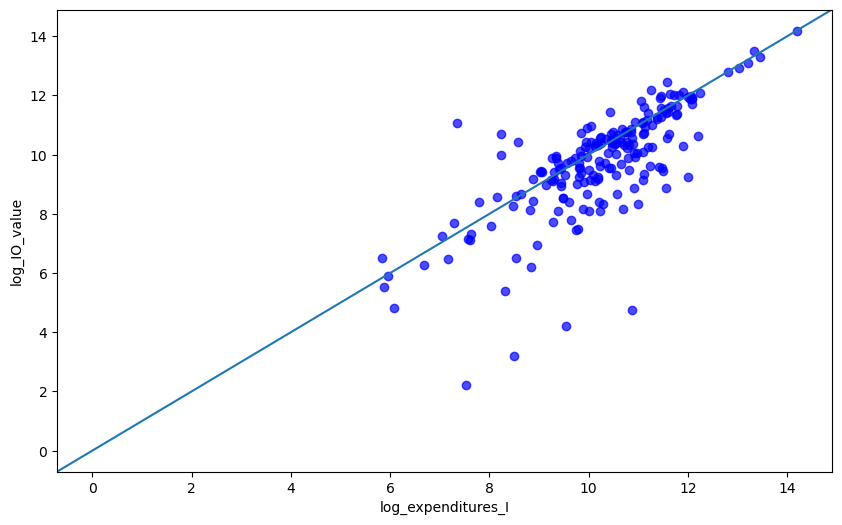

In [24]:
# get logs of everything and do an equivalent scatter plot with those

# do the scatter plot with expenditures on the x axis
plt.figure(figsize=(10, 6))
plt.scatter(np.log(byproduct['expenditures_I']), np.log(byproduct['IO_value']), c='blue', alpha=0.7)

plt.xlabel('log_expenditures_I')
plt.ylabel('log_IO_value')

ax = plt.gca()
ax.axline((0, 0), slope=1)

plt.savefig(path_figures + 'merge_check\\log_expenditures.pdf')
